# Data Analysis Project: Air Quality in Beijing
- **Nama:** Ryan Rachmad Hidayat
- **Email:** rachmadryan36@gmail.com
- **ID Dicoding:** ryanrachmadhidayat22

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren keseluruhan polusi udara (PM2.5, PM10) di Beijing dari waktu ke waktu?
2. Apakah ada pola musiman untuk tingkat polusi udara (PM2.5, PM10) di Beijing?
3. Apakah ada pengaruh pola cuaca seperti kadar CO2, Curah hujan, kecepatan angin, dll terhadap tingkat polusi udara (PM2.5, PM10)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np

# Mengimpor library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Mengimpor library regresi
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

## Data Wrangling

### Gathering Data

In [2]:
# Load masing masing data
Aotizhongxin = pd.read_csv("/content/Aotizhongxin.csv")
Changping = pd.read_csv("/content/Changping.csv")
Dingling = pd.read_csv("/content/Dingling.csv")
Dongsi = pd.read_csv("/content/Dongsi.csv")
Guanyuan = pd.read_csv("/content/Guanyuan.csv")
Gucheng = pd.read_csv("/content/Gucheng.csv")
Huairou = pd.read_csv("/content/Huairou.csv")
Nongzhanguan = pd.read_csv("/content/Nongzhanguan.csv")
Shunyi = pd.read_csv("/content/Shunyi.csv")
Tiantan = pd.read_csv("/content/Tiantan.csv")
Wanliu = pd.read_csv("/content/Wanliu.csv")
Wanshouxigong = pd.read_csv("/content/Wanshouxigong.csv")

In [3]:
# Menggabungkan semua data
data = pd.concat([Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng,
                Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong])
# Membuat variabel tanggal dari variabel tahun, bulan, hari, dan jam
data['date'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


### Assessing Data

In [4]:
# Cek jenis data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   year     420768 non-null  int64         
 2   month    420768 non-null  int64         
 3   day      420768 non-null  int64         
 4   hour     420768 non-null  int64         
 5   PM2.5    412029 non-null  float64       
 6   PM10     414319 non-null  float64       
 7   SO2      411747 non-null  float64       
 8   NO2      408652 non-null  float64       
 9   CO       400067 non-null  float64       
 10  O3       407491 non-null  float64       
 11  TEMP     420370 non-null  float64       
 12  PRES     420375 non-null  float64       
 13  DEWP     420365 non-null  float64       
 14  RAIN     420378 non-null  float64       
 15  wd       418946 non-null  object        
 16  WSPM     420450 non-null  float64       
 17  station  42

### Cleaning Data

In [5]:
# Menghitung jumlah nilai yang hilang pada setiap kolom
missing_values = data.isnull().sum()

# Menghitung persentase nilai yang hilang pada setiap kolom terhadap jumlah keseluruhan data
total_rows = len(data)
percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2).astype(str) + '%'

print("Persentase Missing Value pada Setiap Kolom:")
print(percentage_missing)

Persentase Missing Value pada Setiap Kolom:
No          0.0%
year        0.0%
month       0.0%
day         0.0%
hour        0.0%
PM2.5      2.08%
PM10       1.53%
SO2        2.14%
NO2        2.88%
CO         4.92%
O3         3.16%
TEMP       0.09%
PRES       0.09%
DEWP        0.1%
RAIN       0.09%
wd         0.43%
WSPM       0.08%
station     0.0%
date        0.0%
dtype: object


Dapat dilihat bahwa missing value terbanyak terdapat pada kolom CO sebesar 4,92%. Selain itu, persentase data polutan yang hilang relatif kecil yaitu PM2.5 sekitar 2,08% dan PM10 sekitar 1,53%. Hal tersebut menunjukkan bahwa dataset ini dapat dikatakan relatif lengkap.

In [6]:
# Mengisi missing value dengan metode forward fill
df = data.fillna(method='ffill')
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
dtype: int64

In [7]:
# Cek data duplicate
df.duplicated().sum()

0

Dari hasil di atas, dapat dilihat bahwa sudah tidak ada missing value dan data yang duplikat.

In [8]:
# Menghapus kolom yang tidak digunakan
df.drop(['No', 'hour', 'day'], axis=1, inplace=True)

# Melakukan reset index
df.reset_index(drop=True, inplace=True)

# Mengubah angka menjadi keterangan
df['month'] = df['month'].map({ 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' })
df.head()

,year,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,2013,Mar,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2013,Mar,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,2013,Mar,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,2013,Mar,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,2013,Mar,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [9]:
# Cek Statistika Deskriptif Data
df.describe()

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2014.662560,80.150342,105.062381,15.933593,50.534833,1240.240736,57.443719,13.531801,1010.753501,2.482413,0.064436,1.729789
std,1.177198,81.296332,92.671498,22.281831,35.311061,1170.862949,58.307676,11.438422,10.474728,13.797889,0.820661,1.246571
min,2013.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,112.000000,146.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Langkah dalam membersihkan data**:
- Melakukan imputasi dengan metode forward fill untuk menggantikan nilai yang hilang.
- Memeriksa dan tidak menemukan baris yang duplikat.
- Kolom 'No', 'hour', dan 'day' dihapus karena tidak digunakan.
- Mengubah angka menjadi nama bulan pada kolom 'month'.

In [10]:
# Simpan data yang sudah bersih
df.to_csv("Cleaned_Air_Quality.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore PM2.5

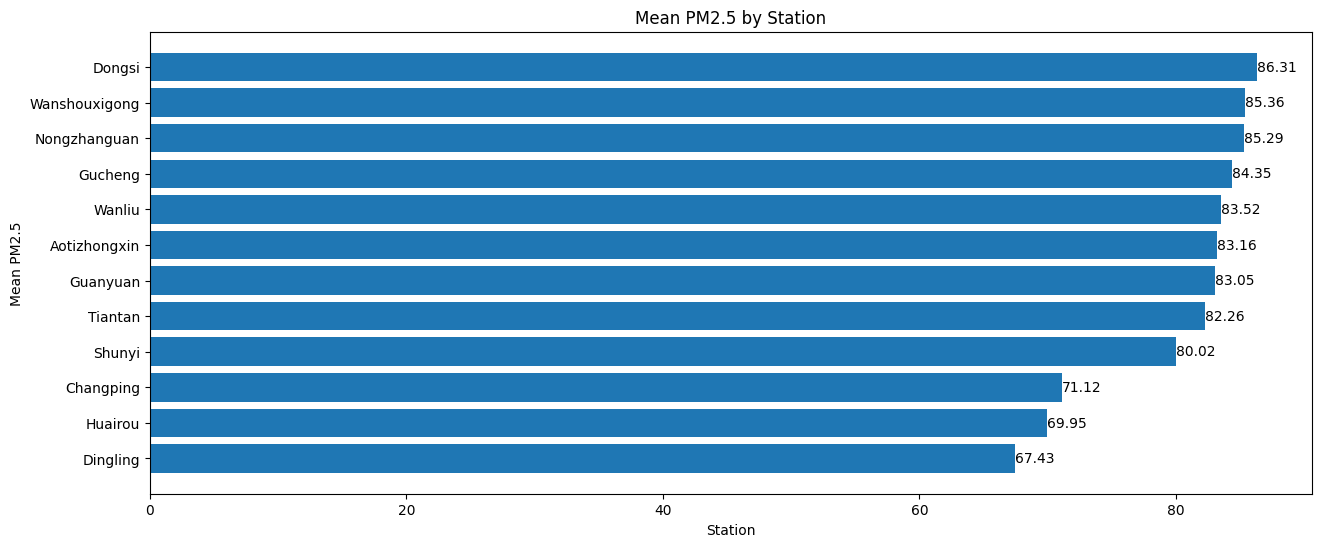

In [11]:
# Mengelompokkan berdasarkan 'station' dan menghitung rata-rata PM2.5
grouped_data = df.groupby(by='station').agg({'PM2.5': ['mean']})

# Reset index agar 'station' menjadi kolom biasa
grouped_data = grouped_data.reset_index()

# Mengurutkan DataFrame berdasarkan nilai rata-rata PM2.5 dari yang terbesar
grouped_data = grouped_data.sort_values(by=('PM2.5', 'mean'), ascending=True)

# Membuat vertical bar chart
plt.figure(figsize=(15, 6))
bars = plt.barh(grouped_data['station'], grouped_data[('PM2.5', 'mean')])
plt.xlabel('Station')
plt.ylabel('Mean PM2.5')
plt.title('Mean PM2.5 by Station')

# Menambahkan label nilai di setiap bar
for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval, yval, round(xval, 2), ha='left', va='center')

plt.show()

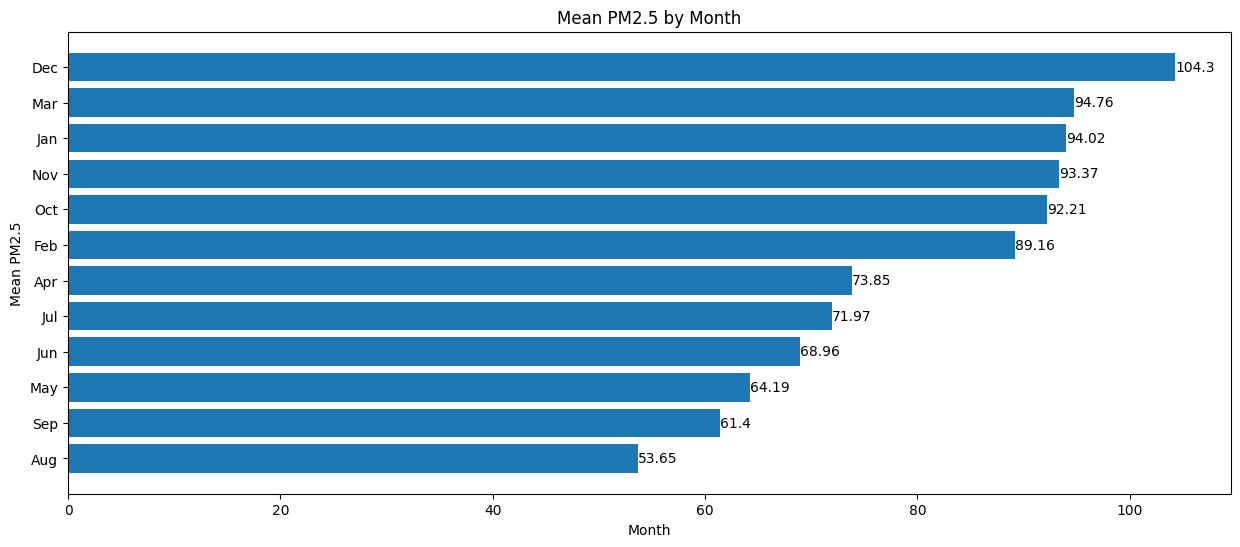

In [12]:
# Mengelompokkan berdasarkan 'month' dan menghitung rata-rata PM2.5
grouped_data = df.groupby(by='month').agg({'PM2.5': ['mean']})

# Reset index agar 'month' menjadi kolom biasa
grouped_data = grouped_data.reset_index()

# Mengurutkan DataFrame berdasarkan nilai rata-rata PM2.5 dari yang terbesar
grouped_data = grouped_data.sort_values(by=('PM2.5', 'mean'), ascending=True)

# Membuat vertical bar chart
plt.figure(figsize=(15, 6))
bars = plt.barh(grouped_data['month'], grouped_data[('PM2.5', 'mean')])
plt.xlabel('Month')
plt.ylabel('Mean PM2.5')
plt.title('Mean PM2.5 by Month')

# Menambahkan label nilai di setiap bar
for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval, yval, round(xval, 2), ha='left', va='center')
plt.show()

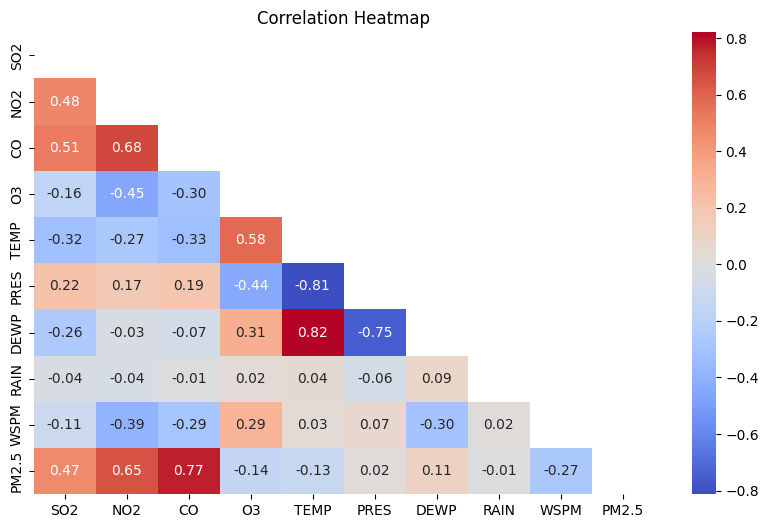

In [13]:
# Membuat heatmap korelasi semua variabel
fig, ax = plt.subplots(figsize=(10,6))
pm2 = df[['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM','PM2.5']]
mask = np.triu(np.ones_like(pm2.corr(numeric_only=True) , dtype=bool))
sns.heatmap(pm2.corr(numeric_only=True) , annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

- Daerah yang memiliki rata rata PM2.5 terkecil adalah stasiun Dingling sebesar 67,43 sedangkan yang terbesar adalah stasiun Dongsi sebesar 86,31.
- Selain itu, rata rata PM2.5 terkecil di bulan Agustus yaitu sebesar 53,65, sedangkan yang terbesar di bulan Desember yaitu sebesar 104,3. Hal tersebut mungkin terjadi karena bulan Agustus di china merupakan musim Panas, sedangkan bulan Desember merupakan musim dingin.
- Dari plot heatmap diatas dapat dilihat bahwa variabel yang memiliki korelasi paling kuat dengan PM2.5 adalah CO (0,77) dan korelasi paling lemah adalah RAIN (-0.01). Berikut detailnya:
  - Korelasi Positif : SO2, NO2, CO, PRES, dan DEWP
  - Korelasi Negatif: O3, TEMP, RAIN, dan WSPM

### Explore PM10

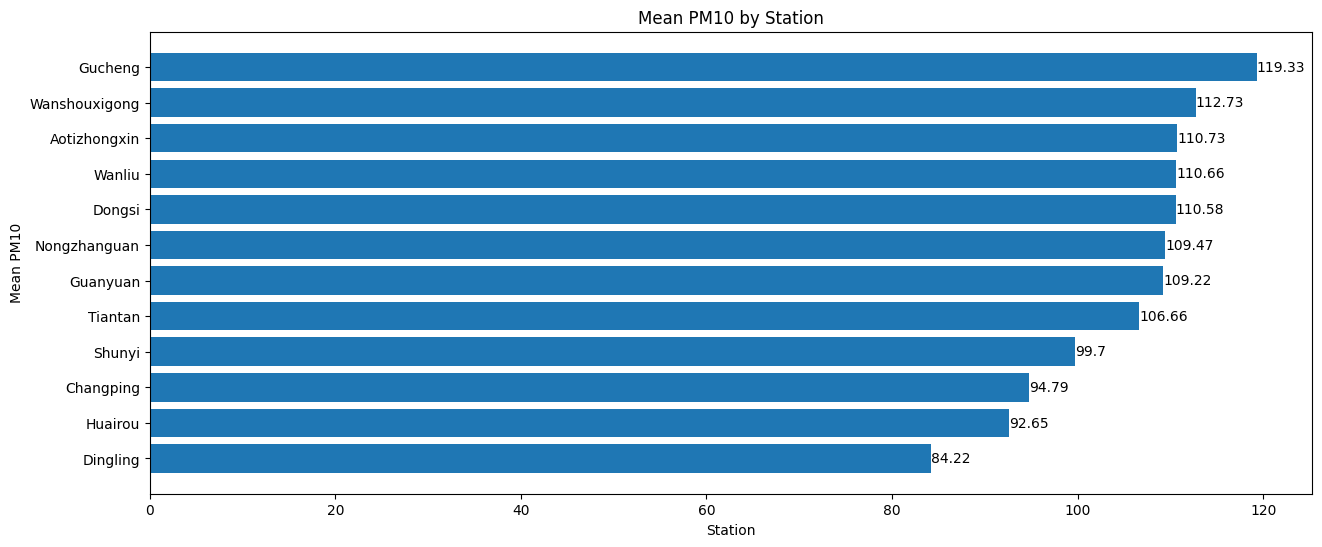

In [14]:
# Mengelompokkan berdasarkan 'station' dan menghitung rata-rata PM10
grouped_data = df.groupby(by='station').agg({'PM10': ['mean']})

# Reset index agar 'station' menjadi kolom biasa
grouped_data = grouped_data.reset_index()

# Mengurutkan DataFrame berdasarkan nilai rata-rata PM10 dari yang terbesar
grouped_data = grouped_data.sort_values(by=('PM10', 'mean'), ascending=True)

# Membuat vertical bar chart
plt.figure(figsize=(15, 6))
bars = plt.barh(grouped_data['station'], grouped_data[('PM10', 'mean')])
plt.xlabel('Station')
plt.ylabel('Mean PM10')
plt.title('Mean PM10 by Station')

# Menambahkan label nilai di setiap bar
for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval, yval, round(xval, 2), ha='left', va='center')
plt.show()

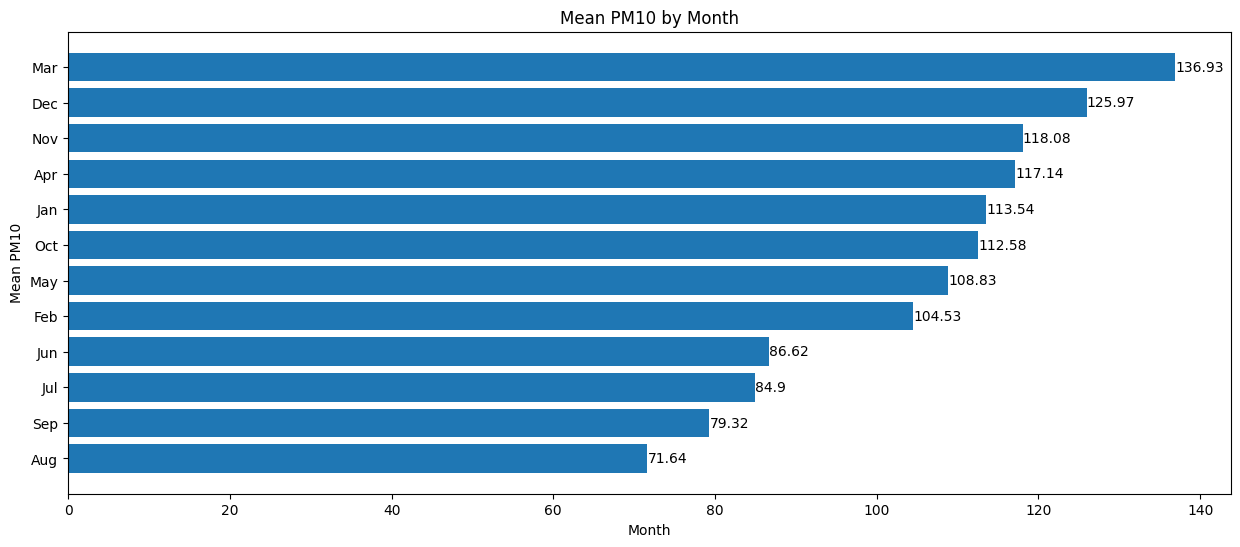

In [15]:
# Mengelompokkan berdasarkan 'month' dan menghitung rata-rata PM10
grouped_data = df.groupby(by='month').agg({'PM10': ['mean']})

# Reset index agar 'month' menjadi kolom biasa
grouped_data = grouped_data.reset_index()

# Mengurutkan DataFrame berdasarkan nilai rata-rata PM10 dari yang terbesar
grouped_data = grouped_data.sort_values(by=('PM10', 'mean'), ascending=True)

# Membuat vertical bar chart
plt.figure(figsize=(15, 6))
bars = plt.barh(grouped_data['month'], grouped_data[('PM10', 'mean')])
plt.xlabel('Month')
plt.ylabel('Mean PM10')
plt.title('Mean PM10 by Month')

# Menambahkan label nilai di setiap bar
for bar in bars:
    xval = bar.get_width()
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(xval, yval, round(xval, 2), ha='left', va='center')
plt.show()

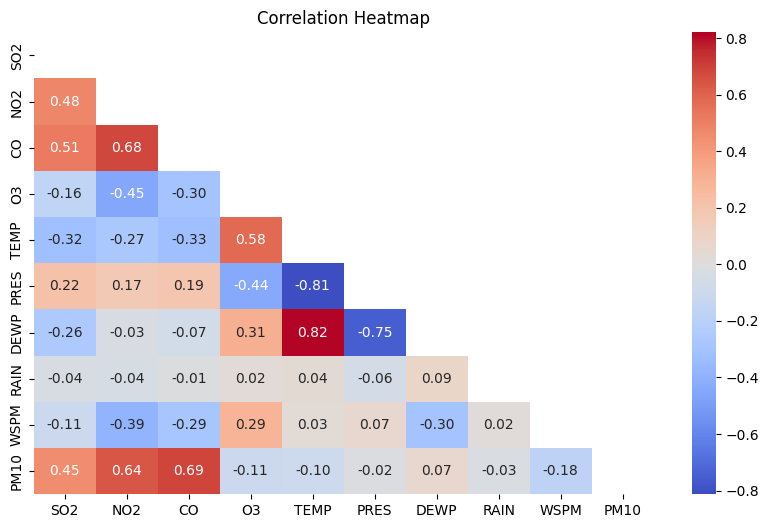

In [16]:
# Membuat heatmap korelasi semua variabel
fig, ax = plt.subplots(figsize=(10,6))
pm10 = df[['SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM','PM10']]
mask = np.triu(np.ones_like(pm10.corr(numeric_only=True), dtype=bool))
sns.heatmap(pm10.corr(numeric_only=True), annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:

- Daerah yang memiliki rata rata PM10 terkecil adalah stasiun Dingling sebesar 84,22 sedangkan yang terbesar adalah stasiun Gucheng sebesar 119,33.
- Selain itu, rata rata PM10 terkecil di bulan Agustus yaitu sebesar 71,64, sedangkan yang terbesar di bulan Maret yaitu sebesar 136,92. Hal tersebut mungkin terjadi karena bulan Agustus di china merupakan musim Panas, sedangkan bulan Maret merupakan musim dingin.
- Dari plot heatmap diatas dapat dilihat bahwa variabel yang memiliki korelasi paling kuat dengan PM10 adalah CO (0,69) dan korelasi paling lemah adalah PRES (-0.02). Berikut detailnya:
  - Korelasi Positif : SO2, NO2, CO, dan DEWP
  - Korelasi Negatif: O3, TEMP, PRES, RAIN, dan WSPM

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana tren keseluruhan polusi udara (PM2.5, PM10) di Beijing dari waktu ke waktu?

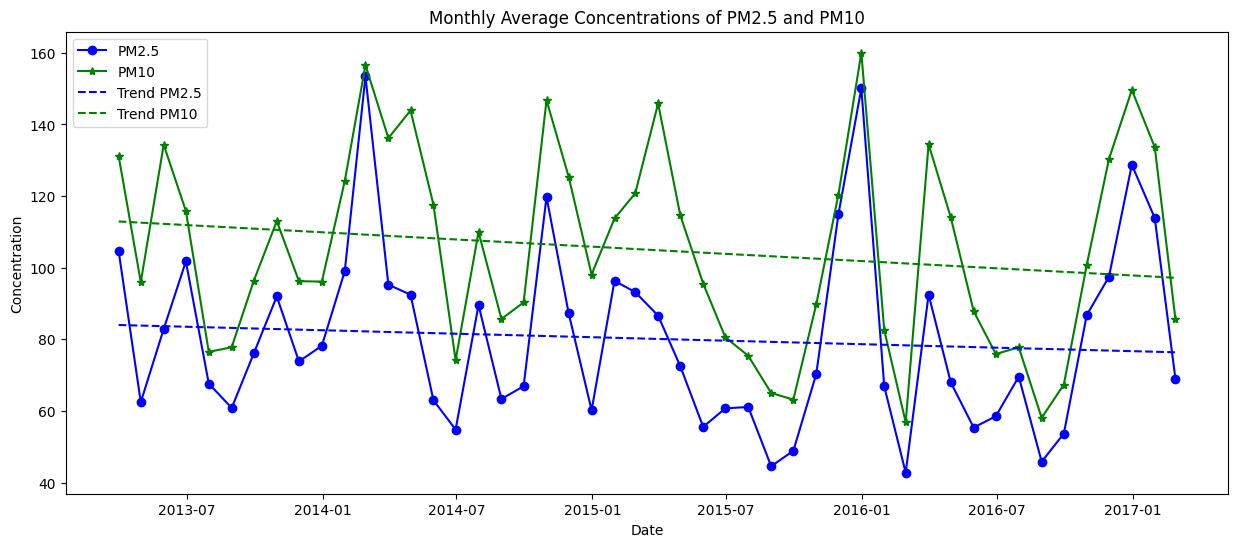

In [17]:
# Membuat data time series terlebih dahulu dengan mengelompokannya berdasarkan bulan
data_time_series = df[['date', 'PM2.5', 'PM10']].set_index('date').resample('M').mean()

# Membuat Line Chart PM2.5 dan PM10 dari data time series
plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', marker = 'o', linestyle= '-', color ='b')
plt.plot(data_time_series.index, data_time_series['PM10'], label='PM10', marker = '*', linestyle= '-', color ='g')
plt.title('Monthly Average Concentrations of PM2.5 and PM10')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

# Menambahkan garis tren untuk PM2.5
x_values = np.arange(len(data_time_series))
y_values = data_time_series['PM2.5']
slope, intercept, _, _, _ = linregress(x_values, y_values)
plt.plot(data_time_series.index, intercept + slope * x_values, linestyle= '--', color='b', label='Trend PM2.5')

# Menambahkan garis tren untuk PM10
y_values = data_time_series['PM10']
slope, intercept, _, _, _ = linregress(x_values, y_values)
plt.plot(data_time_series.index, intercept + slope * x_values, linestyle= '--', color='g', label='Trend PM10')

plt.legend()
plt.show()

Terdapat tren penurunan yang signifikan pada awal hingga akhir data PM10, namun pada data PM2.5 penurunan yang terjadi tidak terlalu signifikan. Dan jika dilihat setiap bulannya kedua data tersebut dapat dikatakan mengalami kenaikan dan penurunan yang tidak beraturan atau dapat dikatakan bahwa data tersebut berfluktuasi.

### Pertanyaan 2:

Apakah ada pola musiman untuk tingkat polusi udara (PM2.5, PM10) di Beijing?

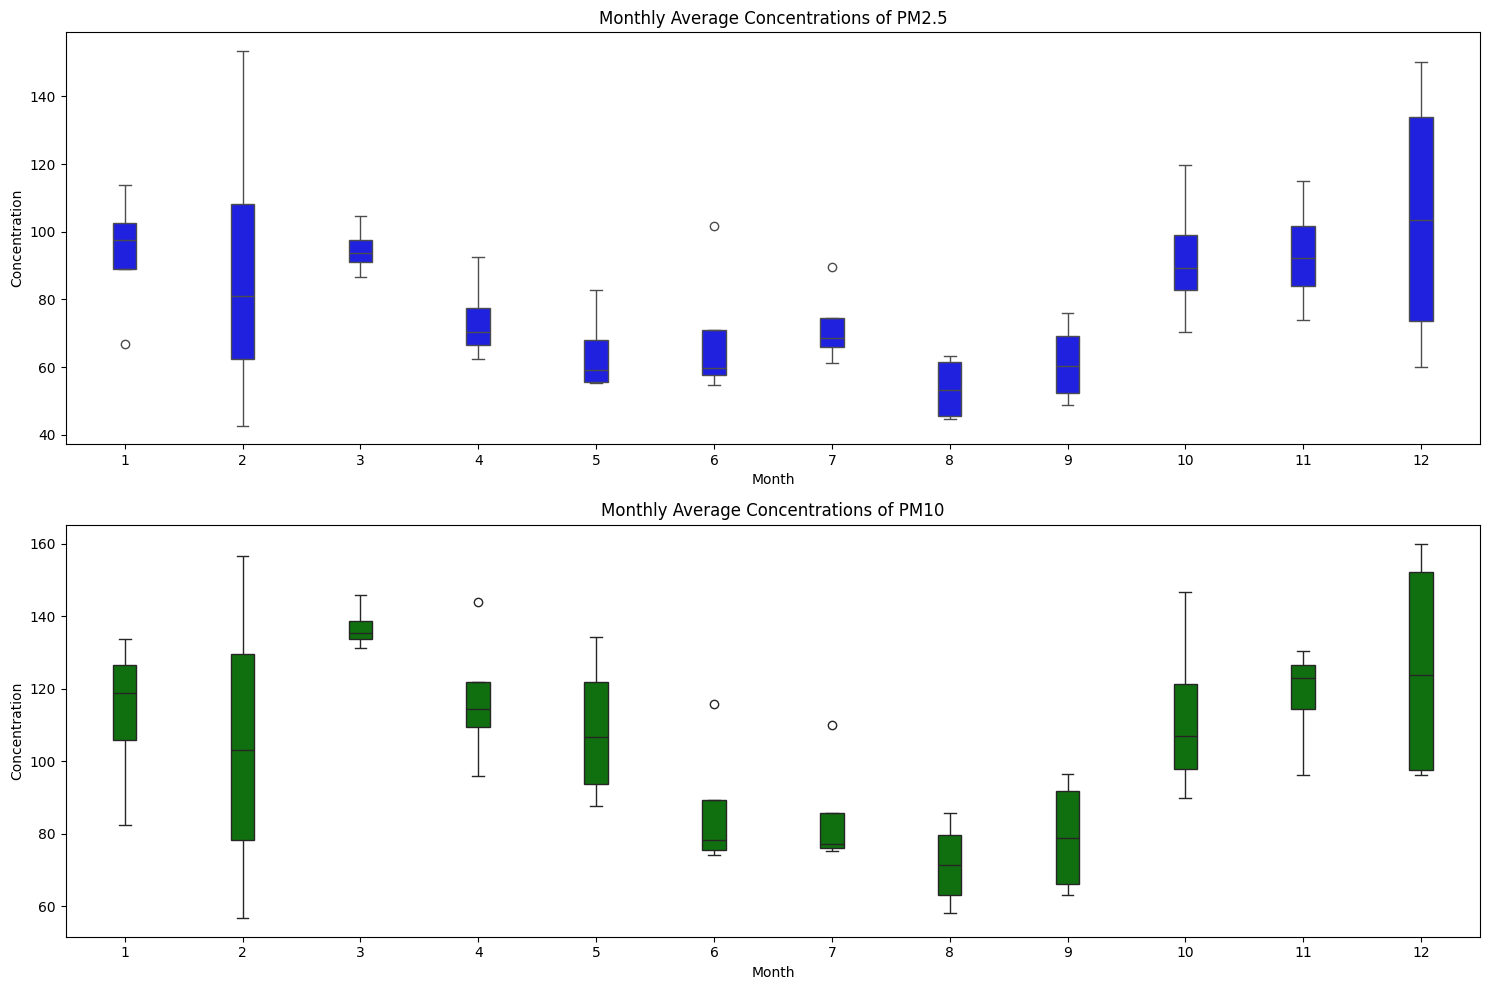

In [18]:
# Membuat figure dan subplot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Boxplot untuk PM2.5
sns.boxplot(x=data_time_series.index.month, y=data_time_series['PM2.5'], color='b', width=0.2, ax=axes[0])
axes[0].set_title('Monthly Average Concentrations of PM2.5')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Concentration')

# Boxplot untuk PM10
sns.boxplot(x=data_time_series.index.month, y=data_time_series['PM10'], color='g', width=0.2, ax=axes[1])
axes[1].set_title('Monthly Average Concentrations of PM10')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Concentration')

plt.tight_layout()
plt.show()

Di kutip dari laman https://www.guilinchina.net/travel-guide/beijing/weather/, musim di Beijing dapat dibagi menjadi berikut:
- **Musim Semi:** sekitar awal bulan **April** hingga minggu-minggu terakhir bulan **Mei**.
- **Musim Panas:** sekitar minggu pertama bulan **Juni** hingga pertengahan **September**.
- **Musim Gugur:** sekitar paruh akhir bulan **September** hingga **November**.
- **Musim Dingin:** sekitar pertengahan **November** hingga **Maret**.


**Data PM2.5:**

Puncak konsentrasi PM2.5 ada di sekitar bulan Desember hingga Februari, hal tersebut terjadi pada musim dingin. Namun perlahan mengalami penurunan pada musim semi, dan kembali naik pada musim panas. Meskipun pada musim panas tingkat konsentrasi PM2.5 tidak sebanyak musim dingin. Pada setiap bulan di musim gugur juga mengalami kenaikan tingkat konsentrasi PM2.5. Sehingga dapat disimpulkan bahwa pada akhir musim dingin hingga akhir musim panas terjadi penurunan tingkat konsentrasi PM2.5 yang signifikan, meskipun pada 2 bulan awal musim panas mengalami kenaikan.

**Data PM10:**

Tingkat konsentrasi pada PM10 tidak jauh berbeda dengan tingkat konsentrasi PM2.5, dimana musim dingin menjadi puncak konsentrasi polusi. Namun terdapat beberapa perbedaan dimana pada akhir musim dingin hingga akhir musim panas selalu mengalami penurunan dan kenaikan tingkat konsentrasi PM10 dimulai pada awal musim gugur hingga akhir musim dingin.

### Pertanyaan 3:

Apakah ada korelasi atau pengaruh antara tingkat polusi udara (PM2.5, PM10) dan pola cuaca lainnya seperti kadar CO2, Curah hujan, kecepatan angin, dll?

#### PM2.5

In [19]:
# Mengecek nama kolom
df.columns

Index(['year', 'month', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'date'],
      dtype='object')

In [20]:
# Mendifinisikan X dan y
y = df['PM2.5']
X = df[['SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM']]

In [21]:
# Buat sebuah dataframe yang akan berisi nama-nama semua variabel fitur dan VIF masing-masing
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,NO2,4.78
2,CO,4.35
6,WSPM,2.78
3,O3,2.63
0,SO2,2.39
4,DEWP,1.55
5,RAIN,1.02


Nilai VIF semua variabel kurang dari 10, artinya semua variabel diatas memiliki pengaruh terhadap tingkat konsentrasi PM2.5.

In [22]:
# Membuat data train dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [23]:
# Menambahkan konstanta
X_train = sm.add_constant(X_train)

# Membuat first fitted model
lr = sm.OLS(y_train, X_train).fit()

# Mencetak ringkasan model regresi linier yang diperoleh
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 8.693e+04
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:17:37   Log-Likelihood:            -1.5490e+06
No. Observations:              294537   AIC:                         3.098e+06
Df Residuals:                  294529   BIC:                         3.098e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.4588      0.274    -85.613      0.0

Text(0, 0.5, 'Coefficient')

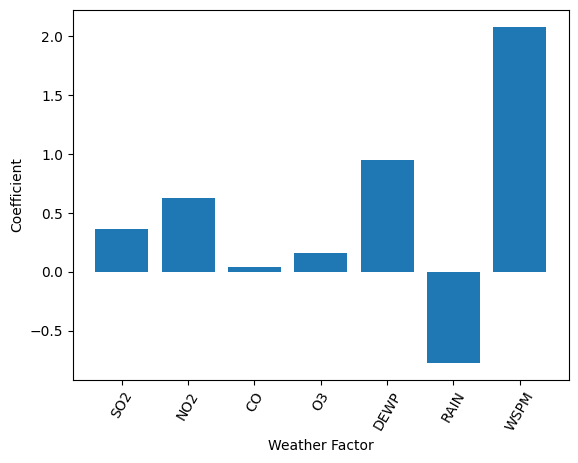

In [24]:
# Multivariate regression
X = df[['SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM']]
y = df['PM2.5']
model = LinearRegression()
model.fit(X, y)

# Bar chart untuk nilai koefisien
plt.bar(X.columns, model.coef_)
plt.xlabel('Weather Factor')
plt.xticks(rotation=60)
plt.ylabel('Coefficient')

Hampir seluruh koefisien variabel independen mengalami kenaikan kecuali Curah Hujan. Artinya setiap kenaikan SO2, NO2, CO, 03, Titik Embun, dan Kecepatan Angin akan meningkatkan tingkat konsentrasi PM2.5, sedangkan kenaikan Curah hujan akan menurunkan tingkat konsentrasi PM2.5. Jika dilihat dari nilai koefisiennya maka dapat dikatakan bahwa Kecepatan Angin memiliki pengaruh yang besar terhadap tingkat konsentrasi PM2.5.

#### PM10

In [25]:
# Mendifinisikan X dan y
y1 = df['PM10']
X1 = df[['SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM']]

In [26]:
# Buat sebuah dataframe yang akan berisi nama-nama semua variabel fitur dan VIF masing-masing
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,NO2,4.78
2,CO,4.35
6,WSPM,2.78
3,O3,2.63
0,SO2,2.39
4,DEWP,1.55
5,RAIN,1.02


Nilai VIF semua variabel kurang dari 10, artinya semua variabel diatas memiliki pengaruh terhadap tingkat konsentrasi PM10.

In [27]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, train_size=0.7, random_state=2529)

In [28]:
import statsmodels.api as sm

# Menambahkan konstanta
X_train1 = sm.add_constant(X_train1)

# Membuat first fitted model
lr1 = sm.OLS(y_train1, X_train1).fit()

# Mencetak ringkasan model regresi linier yang diperoleh
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                 5.917e+04
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:17:42   Log-Likelihood:            -1.6228e+06
No. Observations:              294537   AIC:                         3.246e+06
Df Residuals:                  294529   BIC:                         3.246e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.9152      0.352    -84.969      0.0

Text(0, 0.5, 'Coefficient')

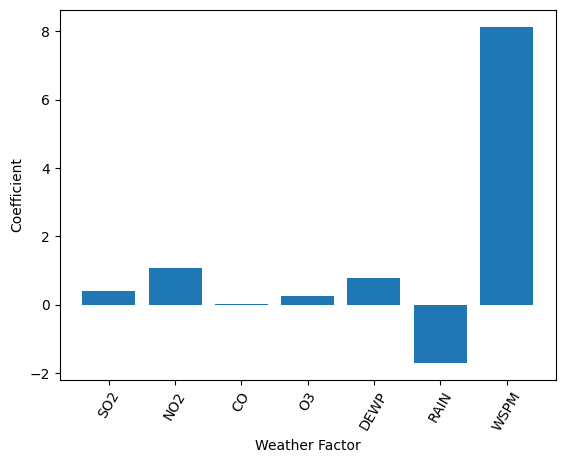

In [29]:
# Multivariate regression
X1 = df[['SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM']]
y1 = df['PM10']
model = LinearRegression()
model.fit(X1, y1)

# Bar chart untuk nilai koefisien
plt.bar(X1.columns, model.coef_)
plt.xlabel('Weather Factor')
plt.xticks(rotation=60)
plt.ylabel('Coefficient')

Hampir seluruh koefisien variabel independen mengalami kenaikan kecuali Curah Hujan. Artinya setiap kenaikan SO2, NO2, CO, 03, Titik Embun, dan Kecepatan Angin akan meningkatkan tingkat konsentrasi PM10, sedangkan kenaikan Curah hujan akan menurunkan tingkat konsentrasi PM10. Jika dilihat dari nilai koefisiennya maka dapat dikatakan bahwa Kecepatan Angin memiliki pengaruh yang sangat besar terhadap tingkat konsentrasi PM10.

## Conclusion

1. Terdapat tren penurunan yang signifikan pada data PM10, namun pada data PM2.5 penurunan yang terjadi tidak terlalu signifikan.


2. Terdapa pola musiman untuk tingkat polusi udara (PM2.5, PM10) di Beijing. Pada kedua tingkat konsentrasi mengalami kenaikan tingkat polusi pada awal musim gugur hingga akhir musim dingin. Dan pada akhir musim dingin hingga akhir musim panas mengalami penurunan tingkat polusi, meskipun pada dua bulan awal musim panas tingkat konsentrasi PM2.5 mengalami kenaikan.


3. Terdapat pengaruh yang signifikan pada variabel SO2, NO2, CO, 03, Titik Embun, Kecepatan Angin, dan Curah hujan terhadap tingkat polusi udara (PM2.5, PM10). Dan dapat dikatakan bahwa Kecepatan Angin memiliki pengaruh yang besar terhadap tingkat polusi udara (PM2.5, PM10) karena memiliki koefisien yang besar, sedangkan setiap kenaikan 1 mm curah hujan akan menurunkan tingkat polusi udara (PM2.5, PM10).